In [23]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
df = pd.read_csv('D:/ESCRITORIO/Github/Road to data science IV/Dataset/text.csv')
df.sample(5)

,Unnamed: 0,text,label
67867,67867,im feeling really numb right now but once i ge...,0
100093,100093,i do make me feel so ashamed that i cannot fac...,0
162100,162100,i feel accepted and a style border bottom styl...,1
263854,263854,i guess i was asking how do you really change ...,0
357108,357108,i promise to uphold the barbie ways which incl...,3


In [3]:
df.shape

(416809, 3)

Six categories: 
- sadness (0)
- joy (1)
- love (2)
- anger (3)
- fear (4)
- surprise (5).

In [4]:
dictionary = {'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4, 'surprise':5}

In [5]:
df.isna().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [6]:
df.label.value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

In [7]:
#The label is imbalanced. 

In [8]:
df.label.describe()

count    416809.000000
mean          1.554271
std           1.490453
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           5.000000
Name: label, dtype: float64

In [9]:
dictionary = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

In [10]:
df['label_mapped'] = df.label.map(dictionary)
df

,Unnamed: 0,text,label,label_mapped
0,0,i just feel really helpless and heavy hearted,4,fear
1,1,ive enjoyed being able to slouch about relax a...,0,sadness
2,2,i gave up my internship with the dmrg and am f...,4,fear
3,3,i dont know i feel so lost,0,sadness
4,4,i am a kindergarten teacher and i am thoroughl...,4,fear
...,...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2,love
416805,416805,i began to realize that when i was feeling agi...,3,anger
416806,416806,i feel very curious be why previous early dawn...,5,surprise
416807,416807,i feel that becuase of the tyranical nature of...,3,anger


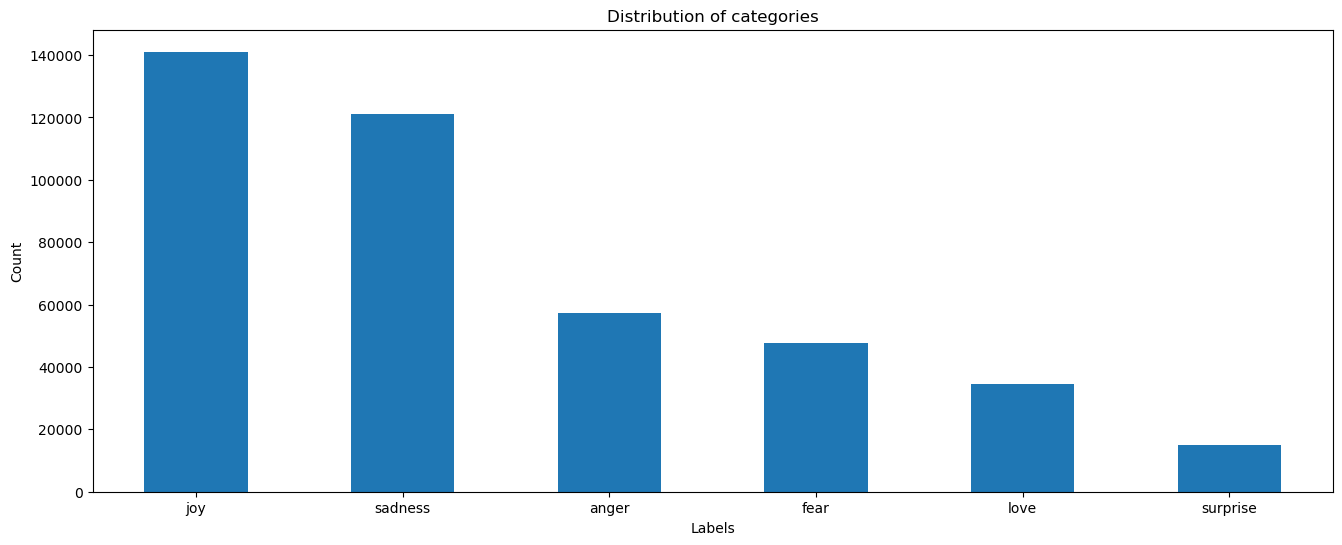

In [11]:
plt.figure(figsize=(16, 6))
df.label_mapped.value_counts().plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of categories')
plt.xticks(rotation=0) 
plt.show()

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAMOS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# text_properties
def text_properties(df):
    df = df.copy()
    df['num_characters']= df['text'].apply(len) # number of characters 
    df['text'].apply(lambda x: nltk.word_tokenize(x))
    df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # number of words    
    return df 

In [14]:
df_prop = text_properties(df)
df_prop

,Unnamed: 0,text,label,label_mapped,num_characters,num_words
0,0,i just feel really helpless and heavy hearted,4,fear,45,8
1,1,ive enjoyed being able to slouch about relax a...,0,sadness,234,45
2,2,i gave up my internship with the dmrg and am f...,4,fear,63,12
3,3,i dont know i feel so lost,0,sadness,26,7
4,4,i am a kindergarten teacher and i am thoroughl...,4,fear,222,42
...,...,...,...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2,love,132,26
416805,416805,i began to realize that when i was feeling agi...,3,anger,111,23
416806,416806,i feel very curious be why previous early dawn...,5,surprise,90,19
416807,416807,i feel that becuase of the tyranical nature of...,3,anger,222,41


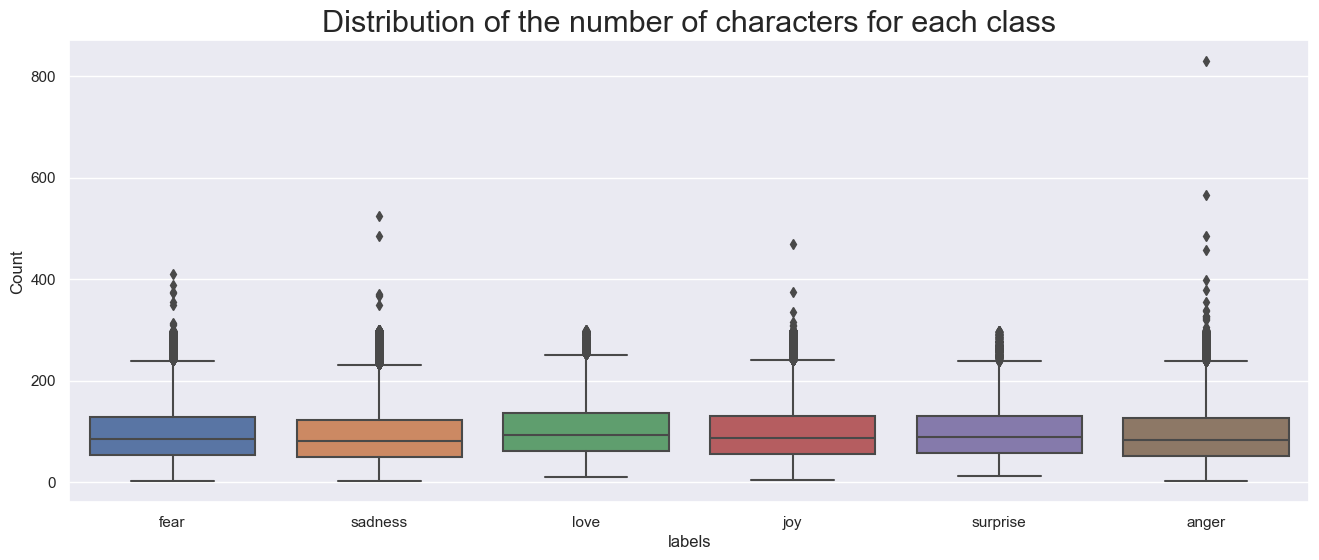

In [15]:
sns.set_theme(rc={'figure.figsize':(16,6)})
sns.boxplot(data=df_prop, x="label_mapped", y="num_characters")
plt.title('Distribution of the number of characters for each class',fontsize=22)
plt.xlabel('labels')
plt.ylabel('Count')
plt.show()

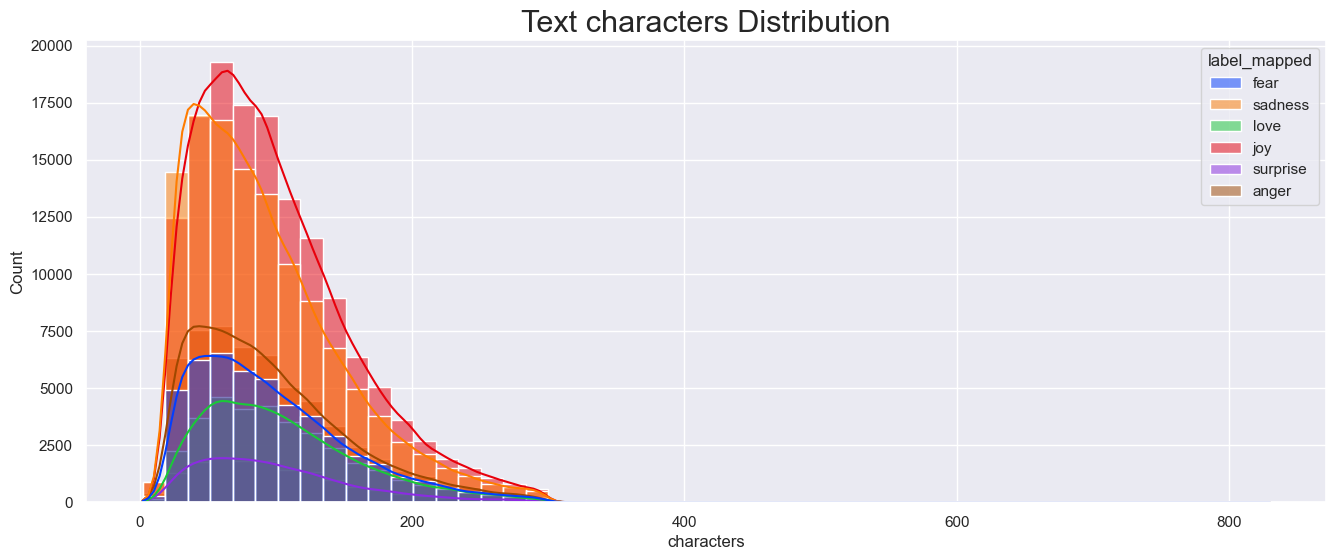

In [16]:
sns.set_theme(rc={'figure.figsize':(16,6)})
sns.set_palette("bright")
sns.histplot(df_prop, x='num_characters',hue='label_mapped' ,bins=50, kde=True)
plt.title('Text characters Distribution',fontsize=22)
plt.xlabel('characters')
plt.ylabel('Count')
plt.show()

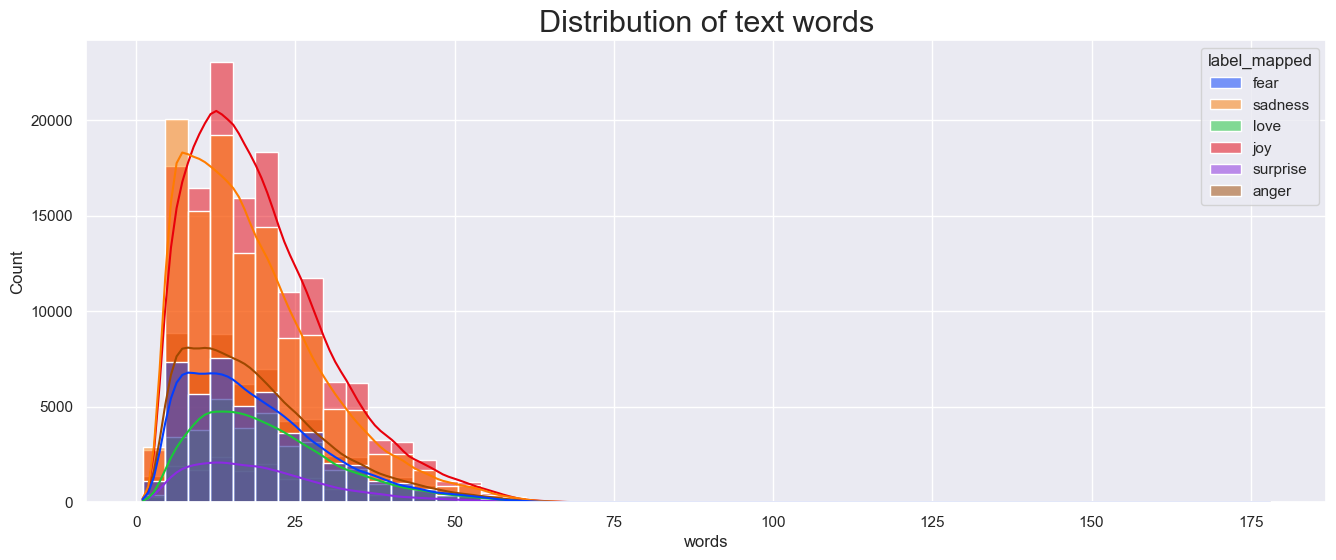

In [17]:
sns.set_theme(rc={'figure.figsize':(16,6)})

sns.set_palette("bright")
sns.histplot(df_prop, x='num_words',hue='label_mapped' ,bins=50, kde=True)
plt.title('Distribution of text words',fontsize=22)
plt.xlabel('words')
plt.ylabel('Count')
plt.show()

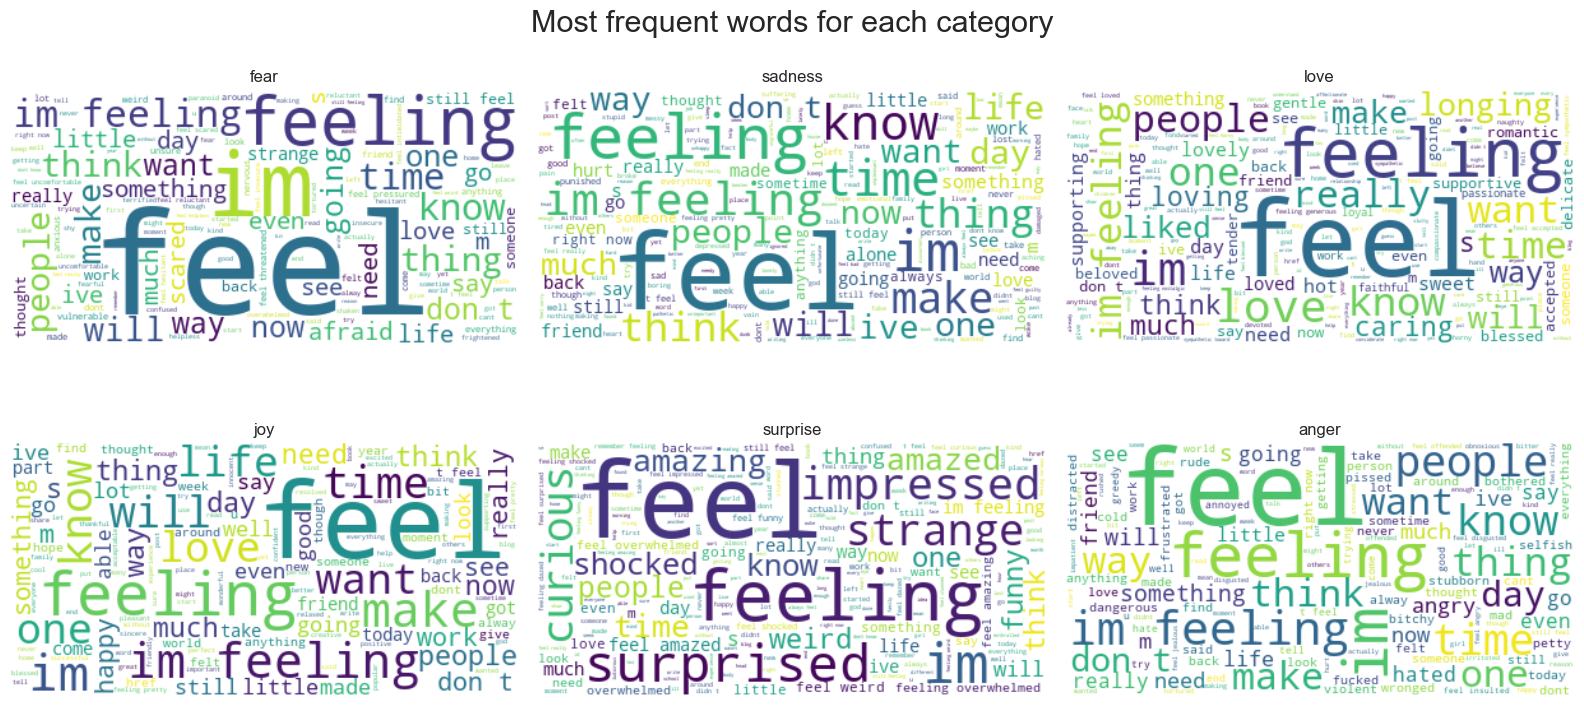

In [21]:
unique_classes = df_prop['label_mapped'].unique()

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i, label in enumerate(unique_classes):
    row = i // num_cols
    col = i % num_cols
    
    texts_for_class = df_prop[df_prop['label_mapped'] == label]['text']
    
    all_text_for_class = ' '.join(texts_for_class)
    
    wordcloud = WordCloud(background_color='white').generate(all_text_for_class)
    
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(label)
    axes[row, col].axis('off')

plt.tight_layout()
plt.suptitle('Most frequent words for each category',fontsize=22)
plt.show()

Most 10 frequent words for each category : 



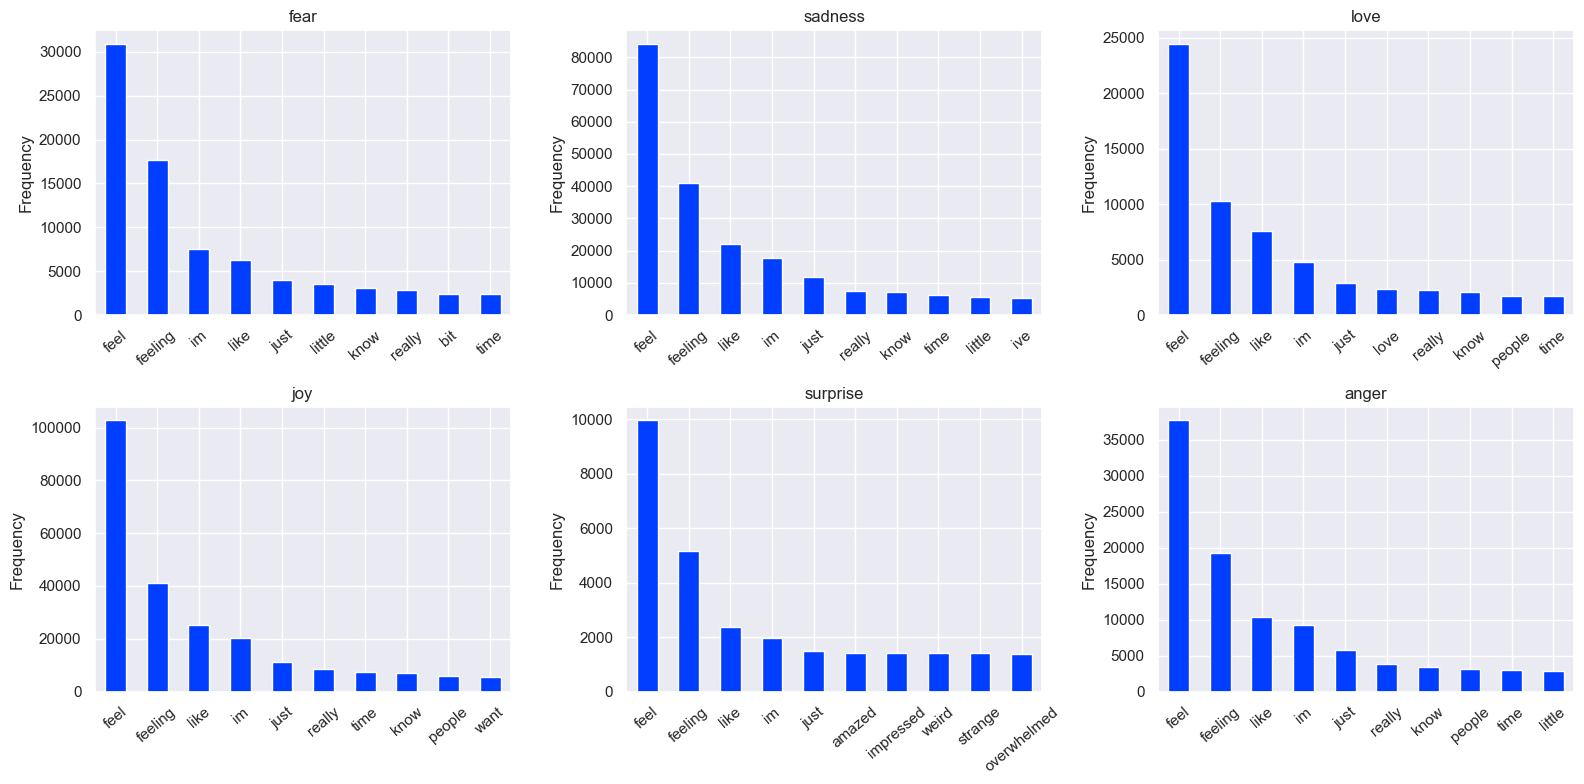

In [24]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

for i, label in enumerate(unique_classes):
    row = i // num_cols
    col = i % num_cols
    
    texts_for_class = df_prop[df_prop['label_mapped'] == label]['text']
    
    word_counts = vectorizer.fit_transform(texts_for_class)
    top_words = pd.DataFrame(word_counts.sum(axis=0), columns=vectorizer.get_feature_names_out())
    top_words = top_words.transpose().sort_values(0, ascending=False).head(10)
    
    top_words.plot(kind='bar', ax=axes[row, col], legend=False)
    axes[row, col].set_title(label)
#     axes[row, col].set_xlabel('Word')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].tick_params(axis='x', rotation=40)

plt.tight_layout()
#plt.suptitle('Most 10 frequent words for each category',fontsize=13)
print("Most 10 frequent words for each category : \n")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['label'])

In [34]:
X_train.sample(5)

384337    i didn t feel that way with the ones from smar...
288996    i feel rejected by them and thus will allow a ...
208997    i definitely had a few days of feeling shitty ...
411674    i feel fantastic healthy and strong but when i...
187176    i hope i get to join them at timbre aft the co...
Name: text, dtype: object

In [35]:
X_train.shape

(333447,)

In [36]:
X_test.shape

(83362,)

In [42]:
preprocess_url = "https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3"
encoder_url = "https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4"

#It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. 
#This model has been pre-trained for English on the Wikipedia and BooksCorpus.

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)


In [44]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']     

In [45]:
get_sentence_embeding([
    'Hello world',
    'Hi universe'
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.9058484 , -0.3095817 , -0.6152439 , ..., -0.30049452,
        -0.6393686 ,  0.91648746],
       [-0.8477359 , -0.24714178,  0.14047529, ...,  0.21590337,
        -0.5770609 ,  0.877857  ]], dtype=float32)>

In [58]:
output = get_sentence_embeding([
    'banana',
    'grapes',
    'apple',
    'car',
    'truck',
    'monkey',
    'credit card'
])

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([output[3]],[output[6]])

array([[0.7078334]], dtype=float32)

In [77]:
inputs = tf.keras.Input(shape=(), dtype = tf.string, name='text')
x = bert_preprocess(inputs)
x = bert_encoder(x)
x = tf.keras.layers.Dropout(0.1, name='dropout')(x['pooled_output'])
outputs = tf.keras.layers.Dense(6, activation='softmax', name='output')(x)

model_without_balancing = tf.keras.Model(inputs, outputs)
model_without_balancing.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [78]:
model_without_balancing.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [79]:
history_model_without_balancing = model_without_balancing.fit(X_train, y_train, epochs=10)

Epoch 1/10
   20/10421 [..............................] - ETA: 10:47:27 - loss: 1.7276 - accuracy: 0.2906

KeyboardInterrupt: 

In [80]:
#Too much time!

In [81]:
#Time to balance and cut the dataset

In [82]:
df.label.value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

In [85]:
df_5 = df[df['label'] == 5]
df_5.shape

(14972, 3)

In [91]:
df_0 = df[df['label'] == 0]
df_0.shape

df_0_downsampled = df_0.sample(df_5.shape[0])
df_0_downsampled.shape

(14972, 3)

In [92]:
df_1 = df[df['label'] == 1]
df_1.shape

df_1_downsampled = df_1.sample(df_5.shape[0])
df_1_downsampled.shape

(14972, 3)

In [93]:
df_2 = df[df['label'] == 2]
df_2.shape

df_2_downsampled = df_2.sample(df_5.shape[0])
df_2_downsampled.shape

(14972, 3)

In [94]:
df_3 = df[df['label'] == 3]
df_3.shape

df_3_downsampled = df_3.sample(df_5.shape[0])
df_3_downsampled.shape

(14972, 3)

In [95]:
df_4 = df[df['label'] == 4]
df_4.shape

df_4_downsampled = df_4.sample(df_5.shape[0])
df_4_downsampled.shape

(14972, 3)

In [96]:
df_balanced = pd.concat([df_0_downsampled,df_1_downsampled,df_2_downsampled,df_3_downsampled,df_4_downsampled,df_5],axis=0)
df_balanced

,Unnamed: 0,text,label
391028,391028,i have been feeling so drained and negative ab...,0
409252,409252,i end up feeling lonely tired burned out and u...,0
314613,314613,i feel pathetic and professors of love should ...,0
77758,77758,i often feel useless post field and if i haven...,0
380899,380899,i feel like i look exhausted whenever someone ...,0
...,...,...,...
416753,416753,i feel like i ve just been stunned,5
416762,416762,i feel like the muscles in and around our eyes...,5
416799,416799,i feel that i must confess even though it kill...,5
416806,416806,i feel very curious be why previous early dawn...,5


In [99]:
df_balanced.label.value_counts()

0    14972
1    14972
2    14972
3    14972
4    14972
5    14972
Name: label, dtype: int64

In [100]:
X = df_balanced.text
y = df_balanced.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df_balanced['label'])

In [101]:
model_balanced = tf.keras.Model(inputs, outputs)
model_balanced.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [103]:
model_balanced.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [104]:
history_model_balanced = model_balanced.fit(X_train, y_train, epochs=10)

Epoch 1/10
   2/2246 [..............................] - ETA: 2:15:45 - loss: 1.9581 - accuracy: 0.2031

KeyboardInterrupt: 

In [171]:
#Bert demands too much time eventhough the reduction of the dataset through downsampling
#CountVectorizer could be a better choice.

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [108]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [118]:
lr_clf = LogisticRegression(max_iter=200)

In [119]:
lr_clf.fit(training_data, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [122]:
lr_clf.score(training_data,y_train)

0.959897029151882

In [120]:
lr_clf.score(testing_data,y_test)

0.9076083931652474

In [131]:
rf_clf = RandomForestClassifier()

In [132]:
rf_clf.fit(training_data, y_train)

RandomForestClassifier()

In [133]:
rf_clf.score(training_data,y_train)

0.9813539275029569

In [134]:
rf_clf.score(testing_data,y_test)

0.8965325318639729

In [123]:
y_pred = lr_clf.predict(testing_data)

In [127]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2995
           1       0.92      0.88      0.90      2995
           2       0.91      0.94      0.92      2994
           3       0.92      0.92      0.92      2994
           4       0.87      0.85      0.86      2994
           5       0.89      0.93      0.91      2995

    accuracy                           0.91     17967
   macro avg       0.91      0.91      0.91     17967
weighted avg       0.91      0.91      0.91     17967



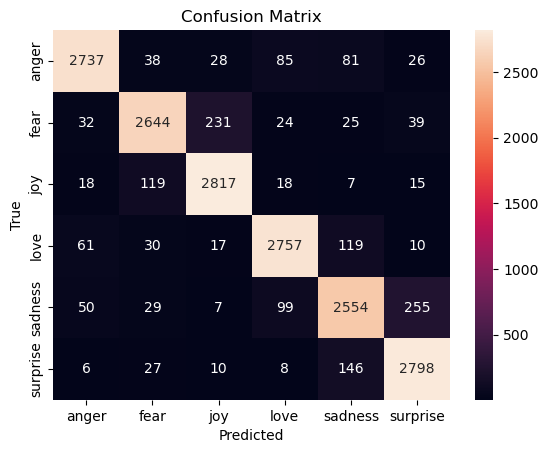

In [129]:
labels=['anger','fear','joy','love','sadness','surprise']
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', 
            xticklabels=labels,
            yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()